In [4]:
import numpy as np

import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")

# print("Path to dataset files:", path)

import pandas as pd
df = pd.read_csv(path+ "/data.csv")
pd.set_option('display.max_rows', 100)

c:\Users\berna\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



100%|██████████| 4.63M/4.63M [00:00<00:00, 12.6MB/s]

Extracting files...


In [9]:
# Function that generates an overview of the whole dataframe 
def data_description(data):
    rows = data.shape[0]        
    data_types = data.dtypes
    counts = data.apply(lambda x: x.count())
    unique_vals = data.apply(lambda x: x.unique().shape[0])
    dups = data.apply(lambda x: x.duplicated().sum())
    nulls = data.apply(lambda x: x.isnull().sum())
    null_percent = (data.isnull().sum()/rows)*100
    cols = {'dtype':data_types, 'No. data':counts, 'Unique Values':unique_vals, 'Duplicates':dups, 'Nulls':nulls, '% Nulls':null_percent}
    table = pd.DataFrame(data=cols)
    return table

In [10]:
data_description(df)


,dtype,No. data,Unique Values,Duplicates,Nulls,% Nulls
Bankrupt?,int64,6819,2,6817,0,0.0
ROA(C) before interest and depreciation before interest,float64,6819,3333,3486,0,0.0
ROA(A) before interest and % after tax,float64,6819,3151,3668,0,0.0
ROA(B) before interest and depreciation after tax,float64,6819,3160,3659,0,0.0
Operating Gross Margin,float64,6819,3781,3038,0,0.0
Realized Sales Gross Margin,float64,6819,3788,3031,0,0.0
Operating Profit Rate,float64,6819,3376,3443,0,0.0
Pre-tax net Interest Rate,float64,6819,3789,3030,0,0.0
After-tax net Interest Rate,float64,6819,3604,3215,0,0.0
Non-industry income and expenditure/revenue,float64,6819,2551,4268,0,0.0


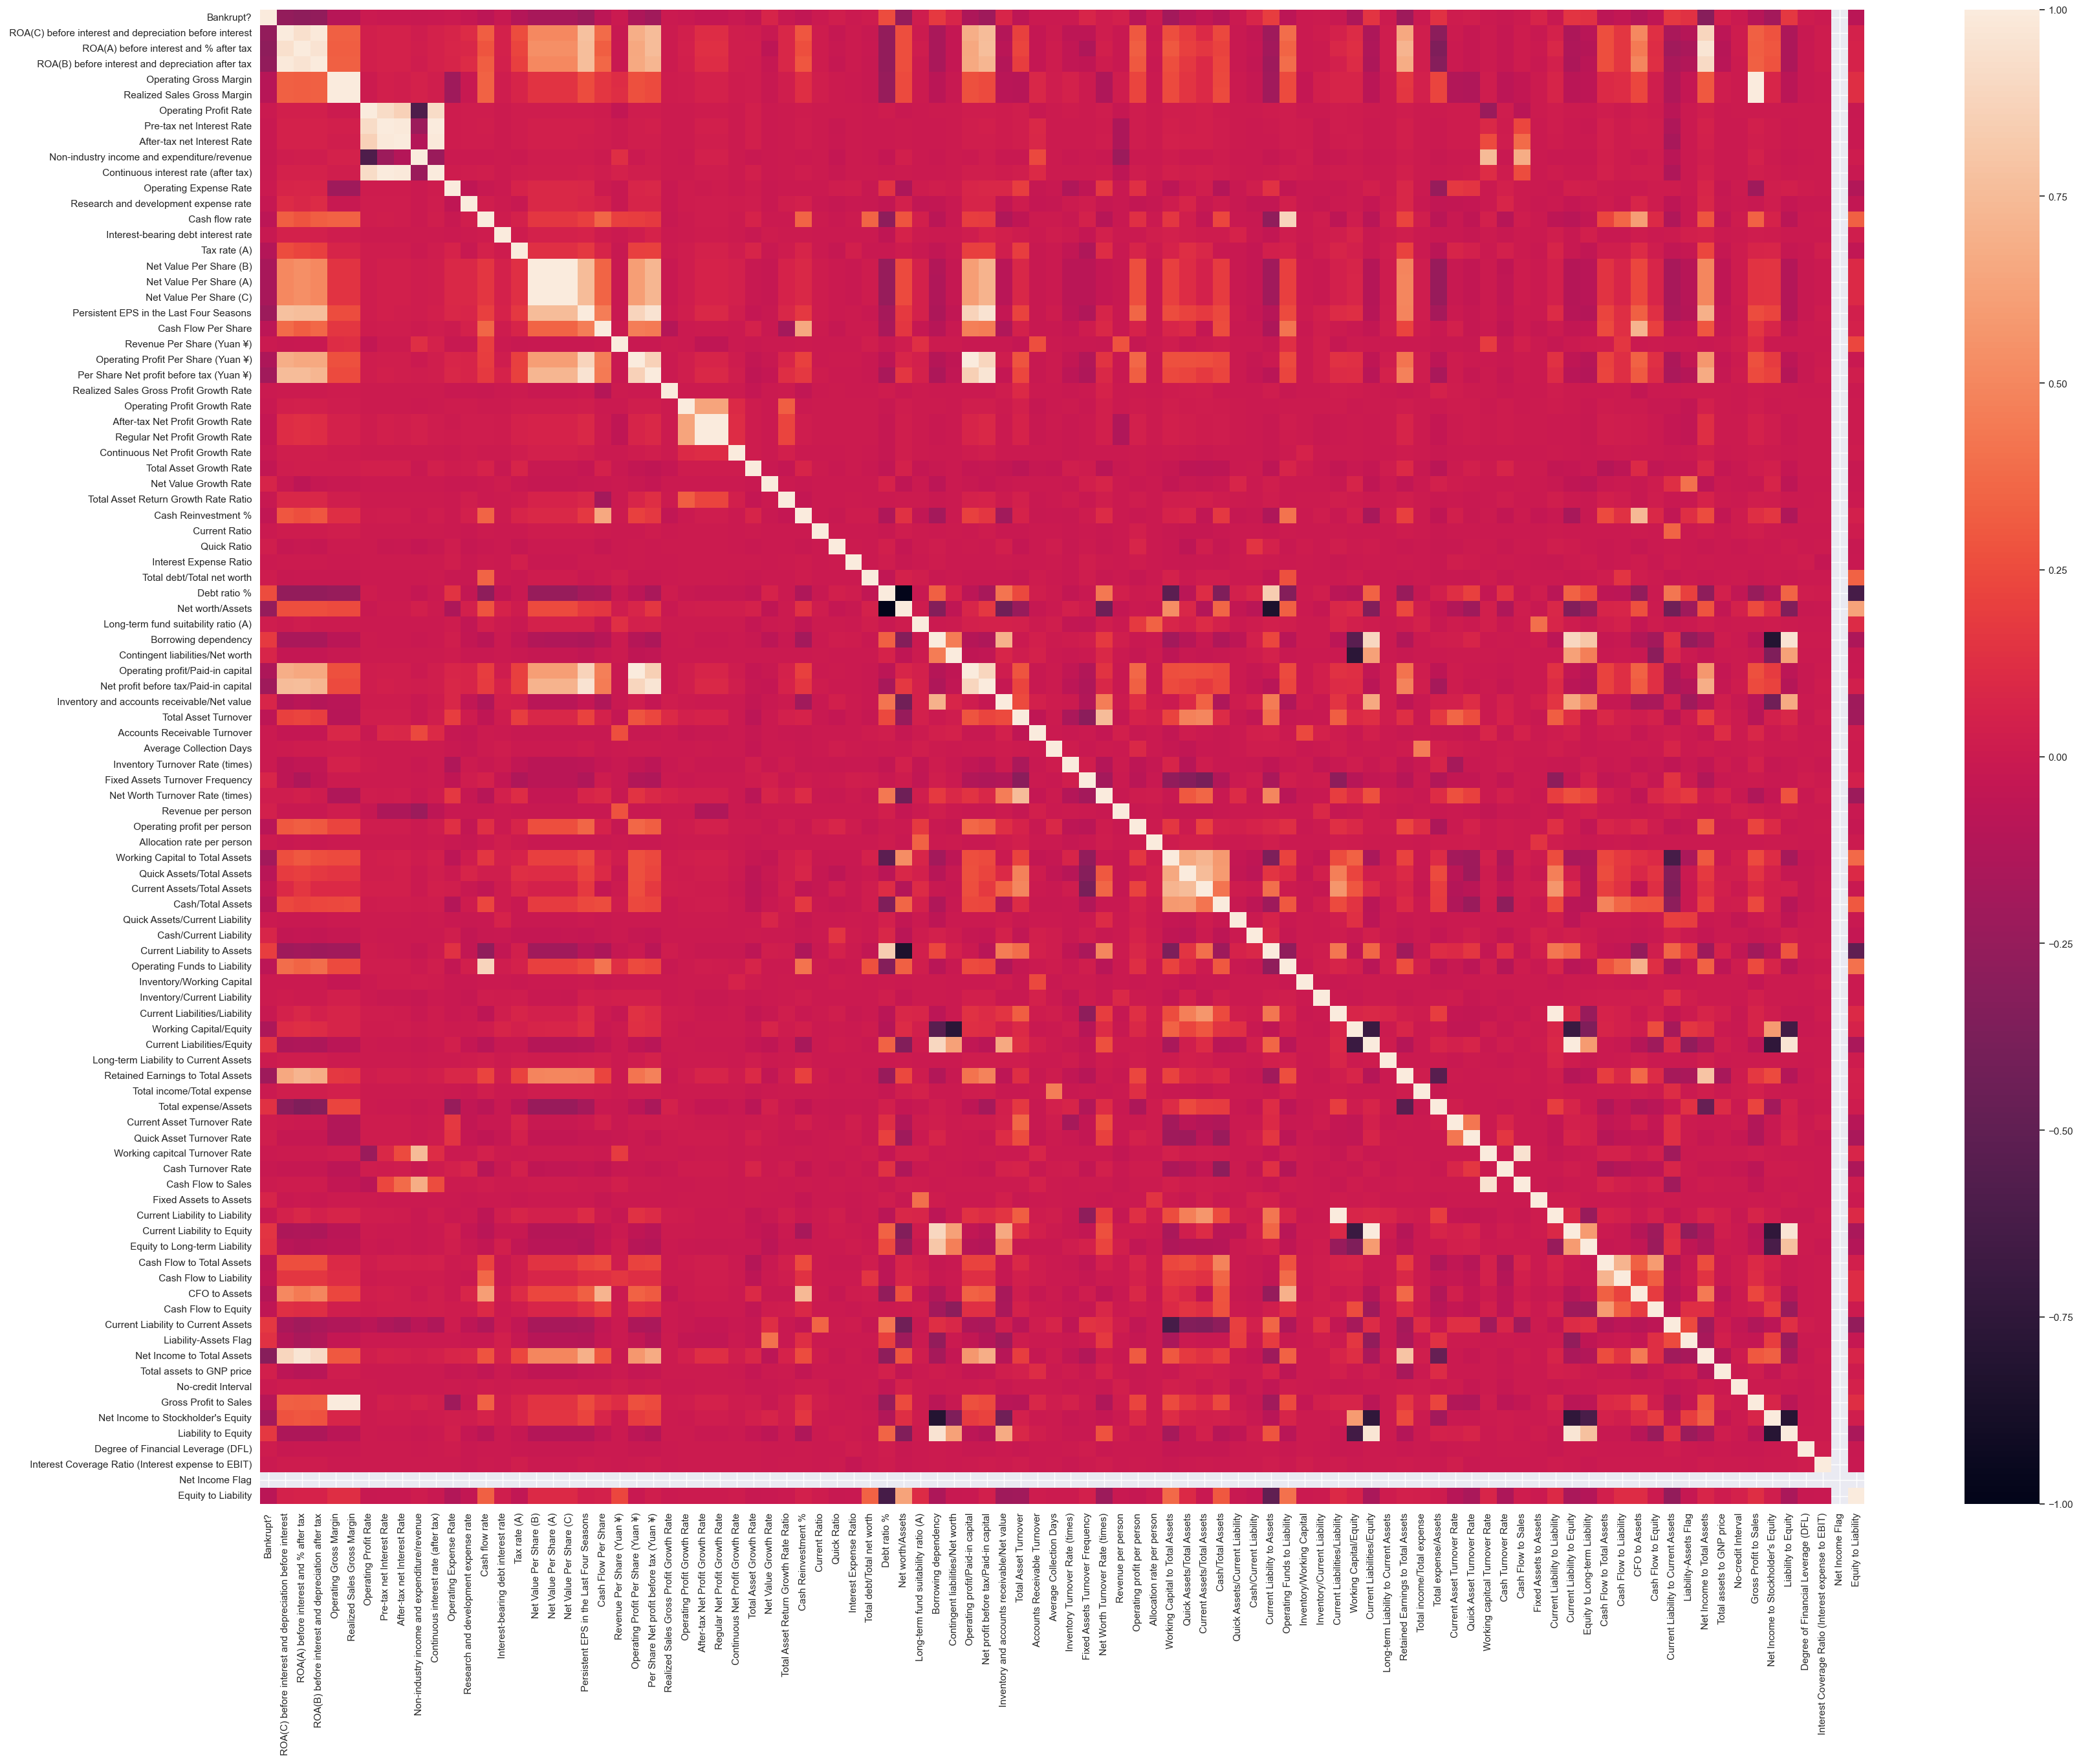

In [11]:
# Verificando la correlación y usando mapa de calor para visualizarla.
sns.set(rc={'figure.figsize':(40,30)})
sns.set_style('darkgrid')

### Heatmap (VARIABLES NUMERICAS del EDA)
sns.heatmap(df.corr(),annot=False)
plt.show()

In [ ]:
data_clean= df.iloc[:, 1:4]
data_clean.to_csv(r'.data_clean.csv', header='true')